<a href="https://colab.research.google.com/github/SimonKato/CAP4621/blob/master/Checkin_3_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clone Repos

In [5]:
!git clone https://github.com/SimonKato/CAP4621/
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

%cd pytorch-CycleGAN-and-pix2pix/
!pip install -r requirements.txt

Cloning into 'CAP4621'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 219 (delta 21), reused 14 (delta 6), pack-reused 179
Receiving objects: 100% (219/219), 315.09 MiB | 40.32 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 38.37 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.
/content/pytorch-CycleGAN-and-pix2pix
     |████████████████████████████████| 686kB 19.4MB/s 
     |████████████████████████████████| 204kB 54.2MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=0d88cebfa7f94c325efa556cc029711d7de099ad6b62b10622625ecc92f87969
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dc

In [7]:
%cd /content/pytorch-CycleGAN-and-pix2pix/
%mkdir checkpoints
!cp -R /content/drive/MyDrive/CAP4621/new/mask_cyclegan_new /content/pytorch-CycleGAN-and-pix2pix/checkpoints/mask_cyclegan_new/

/content/pytorch-CycleGAN-and-pix2pix


In [8]:
# !mv /content/pytorch-CycleGAN-and-pix2pix/mask_cyclegan_new /content/pytorch-CycleGAN-and-pix2pix/checkpoints
%cd /content/pytorch-CycleGAN-and-pix2pix/checkpoints
%ls

/content/pytorch-CycleGAN-and-pix2pix/checkpoints
mask_cyclegan_new/


# Test CycleGAN

In [33]:
#  to change how many images to test, add --num_test
%cd /content/pytorch-CycleGAN-and-pix2pix
!python test.py --dataroot /content/drive/MyDrive/CAP4621/ --name mask_cyclegan_new --model cycle_gan

/content/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CAP4621/	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                l

In [ ]:
!cp -R /content/pytorch-CycleGAN-and-pix2pix/results/ /content/drive/MyDrive/CAP4621/demo 

In [34]:
# imports
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import glob
import random
import numpy as np
from sklearn.model_selection import train_test_split
import skimage 
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


In [35]:
# (real_unmasked, fake_masked) and (fake_unmasked,real_masked)
fake_masked = glob.glob('/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/*fake_B.png')
# real_masked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*real_B.png')
# fake_unmasked = glob.glob('/content/drive/MyDrive/CAP4621/demo/mask_cyclegan/test_latest/images/*fake_A.png')
real_unmasked = glob.glob('/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/*real_A.png')
print("Fake Masked ", fake_masked)
# print("Real Masked ",real_masked)
# print("Fake Unmasked",fake_unmasked)
print("Real Unmasked",real_unmasked)

Fake Masked  ['/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenderong_0009_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenxuedong_0017_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dengziqi_0067_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dongxuan_0206_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_duhaitao_0164_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanganna_0085_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0072_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0078_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_

In [36]:
# slice out fake_masked[len(fake_masked)/2:]
halfway = int(len(fake_masked)/2)
correct = fake_masked[:halfway]
toShuffle = fake_masked[halfway:]
print(correct)
print(toShuffle)

['/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenderong_0009_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_chenxuedong_0017_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dengziqi_0067_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_dongxuan_0206_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_duhaitao_0164_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanganna_0085_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0072_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0078_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/0_0_fanyichen_0

In [14]:
# shuffle toShuffle
random.shuffle(toShuffle)
print(toShuffle)
# concatenate correct and shuffled
fake_masked = correct + toShuffle
print( fake_masked)

['/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_xujinglei_0008_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_yufeng_0026_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_daipeini_0009_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_zhanghuiwen_0040_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_yufeng_0155_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_dongjie_0001_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_yufeng_0039_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_ganwei_0001_fake_B.png', '/content/drive/MyDrive/CAP4621/new/results/mask_cyclegan_new/test_latest/images/1_0_chenxinyu_0015_fake_B.p

In [15]:
labels = np.array([np.array([1]) for x in range(0,halfway)] + [np.array([0]) for x in range(halfway,len(fake_masked))])
# print(labels)

imgs =[]
for i in range(0,len(fake_masked)):
  real = cv2.imread(real_unmasked[i])
  fake = cv2.imread(fake_masked[i])
  new_img = cv2.hconcat([real,fake])
  imgs.append(new_img)

imgs = np.array(imgs)

In [16]:
train_images, test_images, train_labels, test_labels = train_test_split(imgs,labels,test_size=0.2)

In [17]:
discriminator = models.Sequential()
# 32 filters, (3x3) kernel size, relu activation, input shape of (256,512,3)
discriminator.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,512,3))) 
discriminator.add(layers.MaxPooling2D((2,2)))
discriminator.add(layers.Conv2D(64,(3,3),activation='relu'))
discriminator.add(layers.MaxPooling2D((2,2)))
discriminator.add(layers.Conv2D(64,(3,3),activation='relu'))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(64,activation='relu'))
discriminator.add(layers.Dense(2))

In [37]:
# attempt to compile and train
discriminator.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

results = discriminator.fit(train_images,train_labels,epochs=5,validation_data =(test_images,test_labels)) #need to populate this data

Epoch 1/5
1/1 [==============================] - 0s 170ms/step - loss: 164.2265 - accuracy: 0.5000 - val_loss: 412.6879 - val_accuracy: 0.4000
Epoch 2/5
1/1 [==============================] - 0s 73ms/step - loss: 342.0011 - accuracy: 0.5000 - val_loss: 26.2097 - val_accuracy: 0.6000
Epoch 3/5
1/1 [==============================] - 0s 72ms/step - loss: 31.3037 - accuracy: 0.5000 - val_loss: 3.8008 - val_accuracy: 0.4000
Epoch 4/5
1/1 [==============================] - 0s 72ms/step - loss: 1.6846 - accuracy: 0.5625 - val_loss: 0.6767 - val_accuracy: 0.6000
Epoch 5/5
1/1 [==============================] - 0s 56ms/step - loss: 0.0974 - accuracy: 0.9375 - val_loss: 12.4019 - val_accuracy: 0.4000


1/1 - 0s - loss: 135.2874 - accuracy: 0.6000


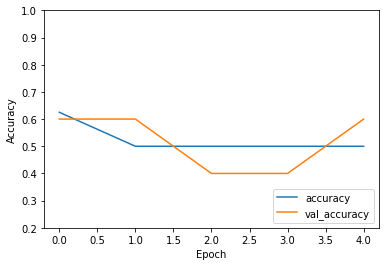

In [21]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = discriminator.evaluate(test_images,  test_labels, verbose=2)

In [32]:
results.history


{'accuracy': [0.625, 0.5, 0.5, 0.5, 0.5],
 'loss': [5.504683494567871,
  12398.8671875,
  4230.26318359375,
  52.9234733581543,
  50.88951873779297],
 'val_accuracy': [0.6000000238418579,
  0.6000000238418579,
  0.4000000059604645,
  0.4000000059604645,
  0.6000000238418579],
 'val_loss': [9931.966796875,
  3376.58154296875,
  136.51881408691406,
  67.6435546875,
  135.2874298095703]}

In [34]:
test_labels

array([[1],
       [0],
       [1],
       [1],
       [0]])

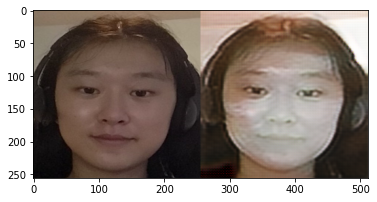

In [22]:
from PIL import Image
path = '/content/pytorch-CycleGAN-and-pix2pix/results/mask_cyclegan_new/test_latest/images/'
out_path ='/content/drive/MyDrive/CAP4621/'

images = os.listdir(path)
real_images = [image for image in images if 'fake_B' in image]
real_images.sort()


fake_images = [image for image in images if 'real_A' in image]
fake_images.sort()

numImages = len(real_images)

x =[]
for num in range(numImages):
  img2 = Image.open(path+ real_images[num])
  img1 = Image.open(path +fake_images[num])
  dst = Image.new('RGB', (2*img1.width, img1.height))
  dst.paste(img1, (0, 0))
  dst.paste(img2, (img1.width, 0))
  plt.imshow(dst)
  x.append(np.asarray(dst))
  dst.save(out_path + real_images[num])

In [24]:
# # test model on new predictions
# x_np = np.asarray(x)
# # print(type(x_np))
# # for image in x_np:
# #   results_test = test_results = discriminator.predict(image)
# #   print(results_test)

# results_test = test_results = discriminator.predict(x_np[:2])
# print(results_test)

[[   8.356002 -298.5544  ]
 [   8.234774 -391.91165 ]]


In [25]:
# discriminator(x_np)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[   8.356002, -298.5544  ],
       [   8.234774, -391.91165 ],
       [  13.004234, -248.73009 ]], dtype=float32)>

In [31]:
probability_model = tf.keras.Sequential([discriminator, 
                                         tf.keras.layers.Softmax()])
print(probability_model)

In [29]:
predictions = probability_model.predict(x_np)

In [30]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)